In [41]:
import nltk
import matplotlib.pyplot as plt

## Ex1

In [7]:
phrase = ["ab", "bc", "abc", "bcd"]

In [8]:
phrase + phrase

['ab', 'bc', 'abc', 'bcd', 'ab', 'bc', 'abc', 'bcd']

In [9]:
phrase[2:]

['abc', 'bcd']

In [10]:
phrase * 3

['ab', 'bc', 'abc', 'bcd', 'ab', 'bc', 'abc', 'bcd', 'ab', 'bc', 'abc', 'bcd']

In [11]:
sorted(phrase)

['ab', 'abc', 'bc', 'bcd']

## Ex2

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
austen_words = nltk.corpus.gutenberg.words("austen-persuasion.txt")

In [5]:
len(austen_words)

98171

In [6]:
len(set(austen_words))

6132

## Ex3

In [13]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [22]:
nltk.corpus.brown.words(categories=["adventure", "fiction"])

['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...]

## Ex4

In [24]:
state_union_texts = nltk.corpus.state_union.fileids()

In [25]:
len(state_union_texts)

65

In [26]:
target_words = {"men", "women", "people"}

In [36]:
for text in state_union_texts:
    words = nltk.corpus.state_union.words(text)
    curated_words = [w for w in words if w in target_words]
    fdist = nltk.FreqDist(curated_words)
    fdist.pprint()

FreqDist({'people': 10, 'men': 2, 'women': 2})
FreqDist({'people': 49, 'men': 12, 'women': 7})
FreqDist({'people': 12, 'men': 7, 'women': 2})
FreqDist({'people': 22, 'men': 4, 'women': 1})
FreqDist({'people': 15, 'men': 2, 'women': 1})
FreqDist({'people': 15, 'men': 6, 'women': 2})
FreqDist({'people': 9, 'men': 8, 'women': 2})
FreqDist({'people': 17, 'men': 3})
FreqDist({'people': 15, 'men': 2})
FreqDist({'people': 26, 'men': 4})
FreqDist({'people': 30, 'men': 2, 'women': 2})
FreqDist({'people': 11, 'men': 5, 'women': 2})
FreqDist({'people': 19, 'men': 2, 'women': 1})
FreqDist({'people': 11, 'men': 4, 'women': 1})
FreqDist({'people': 10, 'men': 2})
FreqDist({'people': 10, 'men': 6})
FreqDist({'people': 10, 'men': 6, 'women': 2})
FreqDist({'people': 3})
FreqDist({'people': 12, 'men': 8, 'women': 5})
FreqDist({'people': 3, 'men': 3, 'women': 1})
FreqDist({'people': 16, 'men': 7})
FreqDist({'people': 14, 'men': 11, 'women': 3})
FreqDist({'people': 35, 'men': 12, 'women': 1})
FreqDist({'pe

In [43]:
# need a conditional freq dist to evaluate changes over time
expr = ((w, fileid[:4])
         for fileid in state_union_texts
         for w in nltk.corpus.state_union.words(fileid)
         if w in target_words)

cfd = nltk.ConditionalFreqDist(expr)

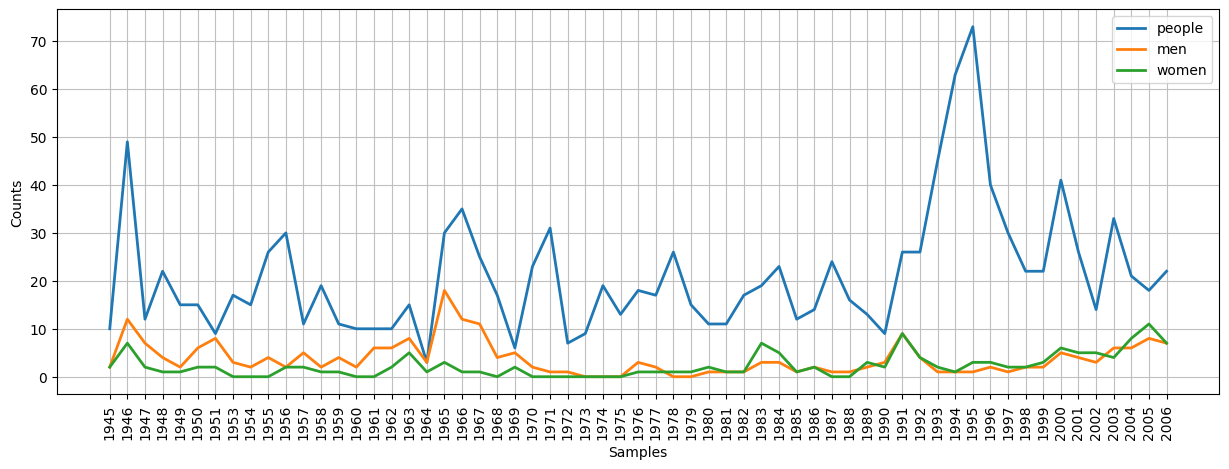

In [50]:
plt.figure(figsize=(15, 5))
cfd.plot();

## Ex5

In [53]:
from nltk.corpus import wordnet as wn

In [58]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [61]:
noun = "tree"

In [62]:
wn.synsets(noun)

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [65]:
noun_synset = wn.synsets(noun)[0]

In [68]:
print("member", noun_synset.member_meronyms())
print("part", noun_synset.part_meronyms())
print("substance", noun_synset.substance_meronyms())

member []
part [Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
substance [Synset('heartwood.n.01'), Synset('sapwood.n.01')]


In [70]:
print("member", noun_synset.member_holonyms())
print("part", noun_synset.part_holonyms())
print("substance", noun_synset.substance_holonyms())

member [Synset('forest.n.01')]
part []
substance []


## Ex 6

In [71]:
from nltk.corpus import swadesh

In [95]:
it2en = swadesh.entries(['it', 'en'])

In [96]:
es2en = swadesh.entries(['es', 'en'])

In [105]:
translate = dict(it2en)

In [106]:
translate.update(dict(es2en))

In [101]:
from itertools import product

In [104]:
for a, b in product(it2en, es2en):
    if a[0] == b[0] and a[1] != b[1]:
        print(a, b)

('largo', 'wide') ('largo', 'long')


In [107]:
translate["largo"]

'long'

i.e. words spelled the same in 2 different languages mean different.

Solution will be to have the `translate` dictionary keys have a lang. prefix/suffix

In [109]:
translate = {f"{k}-it": v for k, v in it2en}

In [110]:
translate.update({f"{k}-es": v for k, v in es2en})

In [114]:
translate["largo-it"], translate["largo-es"]

('wide', 'long')

## Ex 7

In [118]:
brown = nltk.corpus.brown.sents()

In [126]:
brown_texts = nltk.TextCollection(brown)

In [129]:
brown_texts.concordance("However")

Displaying 25 of 552 matches:
th governments '' . Merger proposed However , the jury said it believes `` thes
ment source told The Constitution , however , that Vandiver has not been consul
 to the election was not so quiet , however . It was marked by controversy , an
 . ( Some SEATO nations disagreed , however . ) There was the further complicat
icans . The Democratic leadership , however , hopes to pass it sometime this we
minor editing and clarification ; ; however , the first belief stood for entire
 your timing gets off '' . Moritz , however , kicks only about 10 or 12 extra p
 or pro-Yankee . The record books , however , would favor the Giants' ace . In 
 Van Brocklin's aerials . Skorich , however , is a strong advocate of a balance
standpoint of the army of duffers , however , this was easily the most hearteni
at stroke . Until a few weeks ago , however , Arnold Palmer was some god-like c
ainst teams in the other division . However , this would require a lengthening 
ro Beach ,

In [130]:
gutenberg = nltk.corpus.gutenberg.sents()

In [131]:
gutenberg_texts = nltk.TextCollection(gutenberg)

In [132]:
gutenberg_texts.concordance("However")

Displaying 25 of 673 matches:
 her many enjoyments . The danger , however , was at present so unperceived , t
ion would offend . Miss Churchill , however , being of age , and with the full 
n . From the expense of the child , however , he was soon relieved . The boy ha
 -- and been very well brought up . However , I do not mean to set up my opinio
f and predict . It was not likely , however , that any body should have equalle
to be borne . We will not despair , however . Weston may grow cross from the wa
is so very handsome and agreeable . However , I do really think Mr . Martin a v
 accepted after all . This letter , however , was written , and sealed , and se
e him ." " And if I did , ( which , however , I am far from allowing ) I should
 slightingly . Waiving that point , however , and supposing her to be , as you 
e was not so materially cast down , however , but that a little time and the re
ld inspire him ." The very next day however produced some proof of inspiration 
and staid 

## Ex8

In [142]:
expr = ((fileid[:-3], w[0])
for fileid in nltk.corpus.names.fileids()
for w in nltk.corpus.names.words(fileid))

In [143]:
cfd = nltk.ConditionalFreqDist(expr)

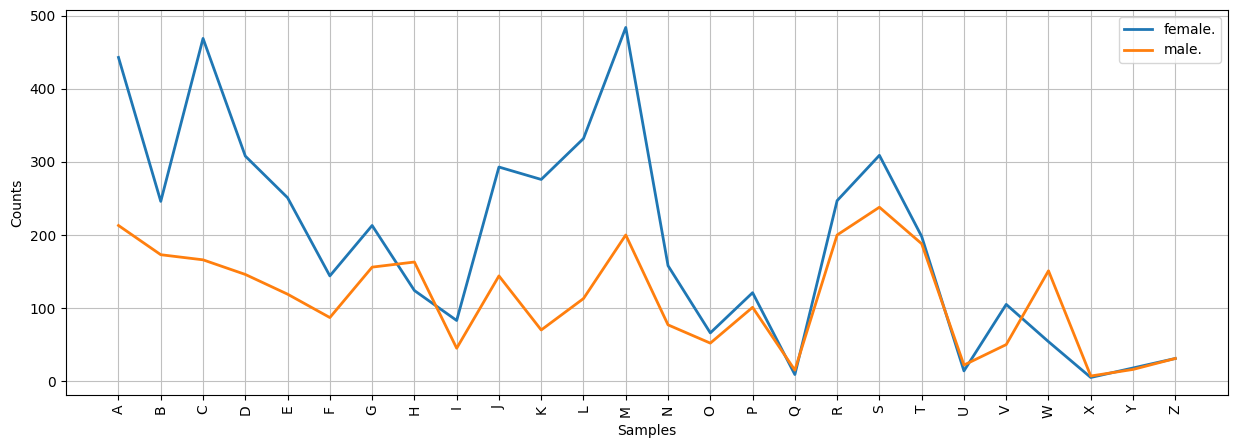

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [144]:
plt.figure(figsize=(15, 5))
cfd.plot()

In [145]:
len(set(nltk.corpus.names.words("female.txt")))

5001

In [147]:
len(set(nltk.corpus.names.words("male.txt")))

2943

## Ex9

In [150]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [151]:
text1 = nltk.Text(nltk.corpus.gutenberg.words("bible-kjv.txt"))

In [152]:
text2 = nltk.Text(nltk.corpus.gutenberg.words("austen-emma.txt"))

In [155]:
len(text1.vocab().keys())

13769

In [156]:
len(text2.vocab().keys())

7811

In [159]:
# vocab richness = uniq words/ total words
len(text1.vocab().keys()) / len(text1.tokens)

0.01362385148626533

In [161]:
len(text2.vocab().keys()) / len(text2.tokens)

0.04059201671283136

In [162]:
text1.concordance("bear")

Displaying 25 of 215 matches:
 My punishment is greater than I can bear . 4 : 14 Behold , thou hast driven m
 13 : 6 And the land was not able to bear them , that they might dwell togethe
hold , thou art with child and shalt bear a son , and shalt call his name Ishm
l Sarah , that is ninety years old , bear ? 17 : 18 And Abraham said unto God 
 And God said , Sarah thy wife shall bear thee a son indeed ; and thou shalt c
blish with Isaac , which Sarah shall bear unto thee at this set time in the ne
laugh , saying , Shall I of a surety bear a child , which am old ? 18 : 14 Is 
gat Rebekah : these eight Milcah did bear to Nahor , Abraham ' s brother . 22 
hah , go in unto her ; and she shall bear upon my knees , that I may also have
herein they were strangers could not bear them because of their cattle . 36 : 
nd set him before thee , then let me bear the blame for ever : 43 : 10 For exc
ing him not unto thee , then I shall bear the blame to my father for ever . 44
pleasant ; and bowed h

In [163]:
text2.concordance("bear")

Displaying 25 of 52 matches:
ld never find fault . How was she to bear the change ?-- It was true that her 
s Taylor live with us for ever , and bear all my odd humours , when she might 
had never cooled , and who could ill bear to part with her . She knew that at 
nd spirits that might be hoped would bear her well and happily through its lit
s all eat up . His own stomach could bear nothing rich , and he could never be
, and that with every disposition to bear , there will be nothing to be borne 
 altogether it was more than I could bear ; and so I never would finish it , t
ember , and Mr . Woodhouse could not bear the idea of her stirring out of her 
. " Nor , if you were , could I ever bear to part with you , my Harriet . You 
hink you ever will . Isabella cannot bear to stay behind her husband ." This w
 had to tell what every field was to bear next year , and to give all such loc
our going to South End . It does not bear talking of ." And for a little while
ound for disappointing 

In [168]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [169]:
nltk.Text(nltk.corpus.gutenberg.words("austen-sense.txt")).concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [170]:
nltk.Text(nltk.corpus.gutenberg.words("melville-moby_dick.txt")).concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


## Ex10

In [213]:
import string

In [232]:
stopwords = set(nltk.corpus.stopwords.words("english"))
punctuation = set(string.punctuation)


In [239]:
def nth_of_all_tokens(words, n=0.3):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    punctuation = set(string.punctuation)
    all_words = [w for w in words if w.lower() not in stopwords
                 and any(char not in punctuation for char in w)]
    
    fdist = nltk.FreqDist(all_words)
    ordered = fdist.most_common(n=len(fdist))
    res = []
    total = len(all_words)
    target = n*total
    cumsum = 0
    for el in ordered:
        cumsum += el[1]
        res.append(el[0])
        if cumsum >= target:
            break
    return res

In [240]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [241]:
ans = nth_of_all_tokens(emma, n=0.333)
print(len(ans), ans)

97 ['Mr', 'Emma', 'could', 'would', 'Mrs', 'Miss', 'must', 'Harriet', 'said', 'much', 'Weston', 'one', 'every', 'thing', 'Knightley', 'Elton', 'think', 'little', 'never', 'good', 'know', 'might', 'well', 'Woodhouse', 'say', 'Jane', 'time', 'quite', 'great', 'Fairfax', 'nothing', 'always', 'man', 'thought', 'Churchill', 'soon', 'see', 'dear', 'may', 'shall', 'without', 'first', 'Frank', 'father', 'sure', 'made', 'like', 'body', 'day', 'young', 'ever', 'Oh', 'indeed', 'friend', 'two', 'though', 'better', 'Hartfield', 'come', 'give', 'way', 'really', 'make', 'Bates', 'rather', 'us', 'long', 'hope', 'done', 'seemed', 'away', 'cannot', 'wish', 'many', 'upon', 'home', 'woman', 'go', 'enough', 'mind', 'Highbury', 'happy', 'even', 'heard', 'moment', 'came', 'last', 'going', 'love', 'room', 'half', 'take', 'look', 'however', 'pleasure', 'felt', 'sort']


In [242]:
ans = nth_of_all_tokens(austen_words, n=0.333)
print(len(ans), ans)

115 ['Anne', 'could', 'would', 'Captain', 'Mrs', 'Elliot', 'Mr', 'must', 'one', 'Wentworth', 'much', 'Lady', 'good', 'little', 'said', 'Charles', 'might', 'never', 'time', 'think', 'Russell', 'Sir', 'Walter', 'well', 'Mary', 'man', 'nothing', 'Musgrove', 'know', 'Miss', 'see', 'soon', 'father', 'great', 'first', 'two', 'Louisa', 'quite', 'always', 'though', 'without', 'Bath', 'every', 'made', 'long', 'say', 'seemed', 'thought', 'Elizabeth', 'last', 'make', 'may', 'go', 'better', 'found', 'however', 'friend', 'home', 'young', 'many', 'sister', 'like', 'felt', 'family', 'away', 'way', 'ever', 'house', 'Uppercross', 'day', 'give', 'feelings', 'room', 'Harville', 'done', 'Henrietta', 'sure', 'Kellynch', 'still', 'come', 'enough', 'moment', 'Benwick', 'back', 'Smith', 'woman', 'even', 'came', 'Lyme', 'Clay', 'present', 'going', 'Admiral', 'heard', 'mind', 'upon', 'happy', 'another', 'party', 'acquaintance', 'knew', 'something', 'almost', 'rather', 'years', 'half', 'seen', 'morning', 'Croft'